This program produces 3 plots: precision, recall, and fscore for the LOF algorithm. The X-axis represents the value k, which is the parameter for the number of nearest neighbors. The Y-axis represents the scores for the three metrics. 

In [1]:
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http')
import numpy as np
X = kdd99_data['data']
y = kdd99_data['target']
y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
    #print('K value: ', n)
    lof = LocalOutlierFactor(n_neighbors = n)
    anomaly_predictions = lof.fit_predict(X)
    
  
    anomaly_predictions = np.array(anomaly_predictions)
    r = recall_score(y, anomaly_predictions, pos_label = -1)
    p = precision_score(y, anomaly_predictions, pos_label = -1)
    f = f1_score(y, anomaly_predictions, pos_label = -1)
    
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [3]:
ilist = []
i = 1
while i<5:
    calculations(i)
    ilist.append(i)
    i=i+1
    
i = 5
while i <= 160:
   calculations(i)
   ilist.append(i)
   i = i*2

In [4]:
#recall_score
print('Values of K: ', ilist)

[1, 2, 3, 4, 5, 10, 20, 40, 80, 160]

In [5]:
print('Recall Scores: ', recall_scores)
print('\nPrecision Scores: ', precision_scores)
print('\nF1 Scores: ', f1_scores)

Recall Scores:  [0.010864644635581712, 0.015844273426889995, 0.013580805794477138, 0.012675418741511997, 0.012675418741511997, 0.01765504753282028, 0.028519692168401993, 0.04843820733363513, 0.05251244907197827, 0.05296514259846084]
Precision Scores:  [0.002041510717931269, 0.003724196637582464, 0.004227733934611048, 0.005074302283436027, 0.00608695652173913, 0.018606870229007633, 0.06687898089171974, 0.12369942196531791, 0.10469314079422383, 0.09337589784517158]
F1 Scores:  [0.0034371643394199777, 0.006030843456534849, 0.006448146157979581, 0.0072473146111039196, 0.008224408870612425, 0.018118466898954706, 0.039987305617264365, 0.06961613532856213, 0.069942719324691, 0.06759098786828423]


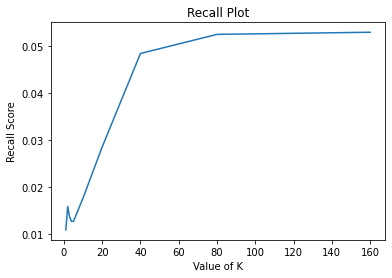

In [6]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Recall Score')
plt.title('Recall Plot')
plt.show()

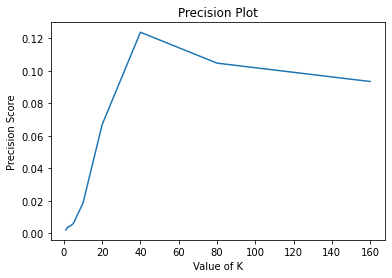

In [7]:
import matplotlib.pyplot as plt
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Precision Score')
plt.title('Precision Plot')
plt.show()

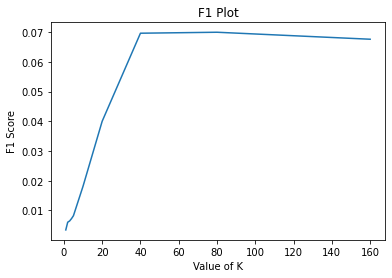

In [8]:
import matplotlib.pyplot as plt
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Plot')
plt.show()